# Shoreline Evolution

## Load data

In [1]:
import pandas as pd

# Read the .xyz file (space or tab delimited)
df = pd.read_csv('data/06_tx_1965-2023_jrk.xyz', delim_whitespace=True, names=['x', 'y', 'z'])

df

C:\Users\Move\AppData\Local\Temp\ipykernel_12460\3245929879.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('data/06_tx_1965-2023_jrk.xyz', delim_whitespace=True, names=['x', 'y', 'z'])
C:\Users\Move\AppData\Local\Temp\ipykernel_12460\3245929879.py:4: DtypeWarning: Columns (0,1,2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/06_tx_1965-2023_jrk.xyz', delim_whitespace=True, names=['x', 'y', 'z'])


,,x,y,z
X,Y,Z,T,loc
109682.41,558181.19,3.77,5-8-1965,900
109677.53,558180.09,3.63,5-8-1965,900
109672.65,558179.00,3.55,5-8-1965,900
109667.77,558177.91,3.41,5-8-1965,900
...,...,...,...,...
117558.08,579018.26,-1.44,3-4-2023,3081
117551.46,579025.77,-1.7,3-4-2023,3081
117544.85,579033.27,-1.88,3-4-2023,3081
117538.24,579040.77,-2.14,3-4-2023,3081


In [2]:
# print shape and info
print(df.shape)
print(df.info())

(1380684, 3)
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1380684 entries, ('X', 'Y') to (117531.63, 579048.27)
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   x       1380684 non-null  object
 1   y       1380684 non-null  object
 2   z       1380684 non-null  object
dtypes: object(3)
memory usage: 51.9+ MB
None


## Preprocess the data

In [3]:
# remove column names and use the first row as headers
df.columns = df.iloc[0]
df = df[1:]

In [4]:
df

,"(X, Y)",Z,T,loc
109682.41,558181.19,3.77,5-8-1965,900
109677.53,558180.09,3.63,5-8-1965,900
109672.65,558179.00,3.55,5-8-1965,900
109667.77,558177.91,3.41,5-8-1965,900
109662.89,558176.82,3.16,5-8-1965,900
...,...,...,...,...
117558.08,579018.26,-1.44,3-4-2023,3081
117551.46,579025.77,-1.7,3-4-2023,3081
117544.85,579033.27,-1.88,3-4-2023,3081
117538.24,579040.77,-2.14,3-4-2023,3081


In [5]:
df.columns

Index(['Z', 'T', 'loc'], dtype='object', name=('X', 'Y'))

In [6]:
df.index

MultiIndex([('109682.41', '558181.19'),
            ('109677.53', '558180.09'),
            ('109672.65', '558179.00'),
            ('109667.77', '558177.91'),
            ('109662.89', '558176.82'),
            ('109658.01', '558175.73'),
            ('109653.13', '558174.64'),
            ('109648.25', '558173.55'),
            ('109643.37', '558172.46'),
            ('109638.49', '558171.37'),
            ...
            (  117591.14,   578980.76),
            (  117584.53,   578988.26),
            (  117577.92,   578995.76),
            (   117571.3,   579003.26),
            (  117564.69,   579010.76),
            (  117558.08,   579018.26),
            (  117551.46,   579025.77),
            (  117544.85,   579033.27),
            (  117538.24,   579040.77),
            (  117531.63,   579048.27)],
           length=1380683)

In [7]:
# find number of rows with similar x and y values (index)
df.index.value_counts()

117800.0   576066.0     84
109573.0   559111.0     80
117605.84  576207.07    43
116490.67  575776.5     43
116965.19  575443.0     43
                        ..
115487.11  572804.09     1
115487.13  570325.22     1
115487.16  570432.3      1
115487.18  572565.5      1
119251.04  577097.98     1
Name: count, Length: 116708, dtype: int64

In [8]:
# create df_xyz that splits the index into x and y columns
df_xyz = df.reset_index()

# handle different possible column names created by reset_index()
if 'index' in df_xyz.columns:
	# index column contains tuples like (x, y)
	df_xyz[['x', 'y']] = pd.DataFrame(df_xyz['index'].tolist(), index=df_xyz.index)
	df_xyz = df_xyz.drop(columns=['index'])
elif 'level_0' in df_xyz.columns and 'level_1' in df_xyz.columns:
	# common names when resetting a MultiIndex without names
	df_xyz = df_xyz.rename(columns={'level_0': 'X', 'level_1': 'Y'})
else:
	# fallback: assume the first two columns are the index levels (coming from reset_index)
	first_two = list(df_xyz.columns[:2])
	df_xyz = df_xyz.rename(columns={first_two[0]: 'X', first_two[1]: 'Y'})

df_xyz

"(X, Y)",X,Y,Z,T,loc
0,109682.41,558181.19,3.77,5-8-1965,900
1,109677.53,558180.09,3.63,5-8-1965,900
2,109672.65,558179.00,3.55,5-8-1965,900
3,109667.77,558177.91,3.41,5-8-1965,900
4,109662.89,558176.82,3.16,5-8-1965,900
...,...,...,...,...,...
1380678,117558.08,579018.26,-1.44,3-4-2023,3081
1380679,117551.46,579025.77,-1.7,3-4-2023,3081
1380680,117544.85,579033.27,-1.88,3-4-2023,3081
1380681,117538.24,579040.77,-2.14,3-4-2023,3081


In [9]:
df_xyz.iloc[0]

(X, Y)
X      109682.41
Y      558181.19
Z           3.77
T       5-8-1965
loc          900
Name: 0, dtype: object

In [10]:
# type of data in df_xyz
df_xyz.dtypes

(X, Y)
X      object
Y      object
Z      object
T      object
loc    object
dtype: object

In [11]:
# access data by collection date (T) when 'T' = 5-8-1965
df_xyz[df_xyz['T'] == '5-8-1965']

"(X, Y)",X,Y,Z,T,loc
0,109682.41,558181.19,3.77,5-8-1965,900
1,109677.53,558180.09,3.63,5-8-1965,900
2,109672.65,558179.00,3.55,5-8-1965,900
3,109667.77,558177.91,3.41,5-8-1965,900
4,109662.89,558176.82,3.16,5-8-1965,900
...,...,...,...,...,...
7348,118417.78,578043.12,-3.50,5-8-1965,3081
7349,118404.56,578058.12,-3.60,5-8-1965,3081
7350,118391.33,578073.12,-3.60,5-8-1965,3081
7351,118378.10,578088.13,-3.60,5-8-1965,3081


In [12]:
# count and print unique values in 'T' column
print(df_xyz['T'].nunique())
# print the unique values
print(df_xyz['T'].unique())

154
['5-8-1965' '20-7-1965' '14-5-1965' '25-5-1965' '17-8-1966' '13-7-1967'
 '20-7-1967' '20-7-1968' '21-7-1969' '20-7-1969' '15-5-1970' '8-6-1970'
 '18-6-1970' '8-7-1970' '11-6-1970' '7-7-1970' '9-7-1970' '23-9-1970'
 '12-6-1970' '30-7-1970' '13-7-1970' '17-7-1970' '7-9-1970' '10-8-1970'
 '4-8-1970' '12-8-1970' '12-5-1970' '11-8-1970' '5-8-1970' '12-10-1970'
 '10-6-1971' '11-6-1971' '27-4-1971' '1-7-1971' '6-9-1971' '7-9-1971'
 '8-9-1971' '9-9-1971' '13-9-1971' '2-6-1971' '26-5-1971' '4-6-1971'
 '22-9-1971' '15-9-1971' '14-9-1971' '16-9-1971' '17-9-1971' '23-5-1972'
 '5-7-1972' '1-8-1972' '2-8-1972' '30-8-1972' '31-8-1972' '1-9-1972'
 '9-5-1973' '22-5-1973' '6-6-1973' '17-8-1973' '21-8-1973' '20-8-1973'
 '30-8-1973' '5-9-1973' '6-8-1973' '14-9-1973' '6-9-1973' '31-8-1973'
 '25-9-1973' '27-9-1973' '26-9-1973' '4-10-1973' '3-10-1973' '2-10-1973'
 '3-6-1974' '13-6-1974' '4-4-1974' '23-7-1974' '24-7-1974' '25-7-1974'
 '26-7-1974' '13-8-1974' '28-8-1974' '29-8-1974' '17-9-1974' '18-9-1974'

In [13]:
# print the count of each unique value in 'T' column
t_counts_df = df_xyz['T'].value_counts().rename_axis('T').reset_index(name='count')

# sort by year (assuming 'T' is in 'D-M-YYYY' format)
t_counts_df['year'] = pd.to_datetime(t_counts_df['T'], format='%d-%m-%Y').dt.year
t_counts_df = t_counts_df.sort_values(by='year').drop(columns=['year'])

print(t_counts_df)

# save t_counts_df to a CSV file
t_counts_df.to_csv('data/tx_xyz_date_counts.csv', index=False)

            T  count
49   5-8-1965   6206
87  20-7-1965    390
84  25-5-1965    421
95  14-5-1965    336
47  17-8-1966   6393
..        ...    ...
9   20-1-2019  32418
12   7-3-2020  32018
10  16-4-2021  32238
4   27-2-2022  40540
0    3-4-2023  68976

[154 rows x 2 columns]


In [14]:
# Since the data was collected on multiple dates in a year;
# we can view the data collected in the same year by grouping by year
# thus, we create a new column 'year' from 'T'
df_xyz['year'] = pd.to_datetime(df_xyz['T'], format='%d-%m-%Y').dt.year
df_xyz.groupby('year').size()

year
1965     7353
1966     6393
1967     5960
1968     6219
1969     6118
1970     7287
1971     6321
1972     4298
1973     6547
1974     6121
1975     8538
1976     6607
1977     7548
1978     9271
1979    13518
1980    15074
1982    13150
1983    13347
1984    13626
1985    20321
1986    17731
1987    17641
1988    24579
1989    27515
1990    32513
1991    27222
1992    27351
1993    34494
1994    26444
1995    27272
1996    45042
1997    44262
1998    45683
1999    28342
2000    27660
2001    29423
2002    27664
2003    32588
2004    26537
2005    27182
2006    26567
2007    20629
2008    23078
2009    35494
2010    28789
2011    31607
2012    31541
2013    31629
2014    31212
2015    31502
2016    31959
2017    32123
2018    37601
2019    32418
2020    32018
2021    32238
2022    40540
2023    68976
dtype: int64

In [15]:
df_xyz

"(X, Y)",X,Y,Z,T,loc,year
0,109682.41,558181.19,3.77,5-8-1965,900,1965
1,109677.53,558180.09,3.63,5-8-1965,900,1965
2,109672.65,558179.00,3.55,5-8-1965,900,1965
3,109667.77,558177.91,3.41,5-8-1965,900,1965
4,109662.89,558176.82,3.16,5-8-1965,900,1965
...,...,...,...,...,...,...
1380678,117558.08,579018.26,-1.44,3-4-2023,3081,2023
1380679,117551.46,579025.77,-1.7,3-4-2023,3081,2023
1380680,117544.85,579033.27,-1.88,3-4-2023,3081,2023
1380681,117538.24,579040.77,-2.14,3-4-2023,3081,2023


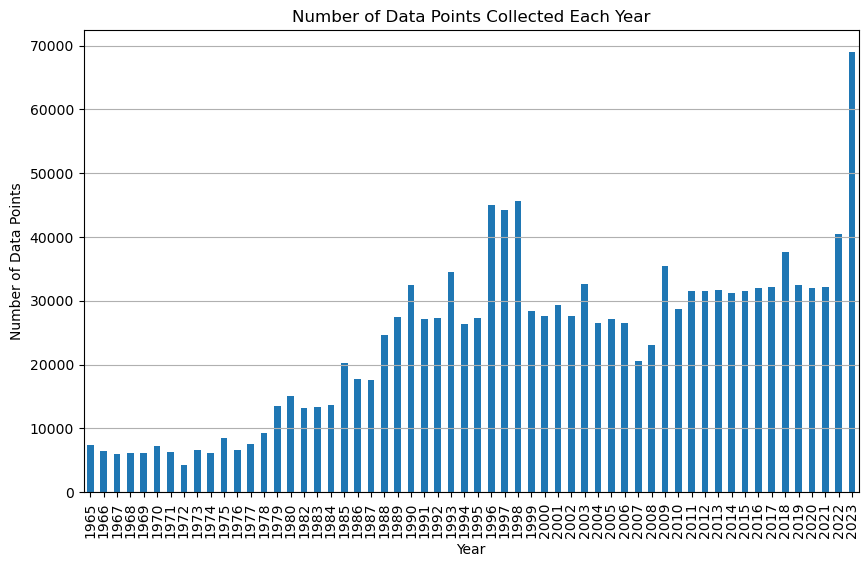

In [16]:
# plot time series of available data points per year
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df_xyz['year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points Collected Each Year')
plt.grid(axis='y')
plt.show()

In [17]:
# convert X, Y, Z to numeric (coerce bad values to NaN) before computing min/max
x = pd.to_numeric(df_xyz['X'], errors='coerce')
y = pd.to_numeric(df_xyz['Y'], errors='coerce')
z = pd.to_numeric(df_xyz['Z'], errors='coerce')
year = pd.to_numeric(df_xyz['year'], errors='coerce')

print(f"X: min={x.min()}, max={x.max()}, NaNs={x.isna().sum()}")
print(f"Y: min={y.min()}, max={y.max()}, NaNs={y.isna().sum()}")
print(f"Z: min={z.min()}, max={z.max()}, NaNs={z.isna().sum()}")
print(f"Year: min={int(year.min()) if pd.notna(year.min()) else None}, max={int(year.max()) if pd.notna(year.max()) else None}")

X: min=103755.72, max=119363.46, NaNs=0
Y: min=556933.41, max=580379.14, NaNs=0
Z: min=-17.6, max=23.48, NaNs=0
Year: min=1965, max=2023


## Visualize data

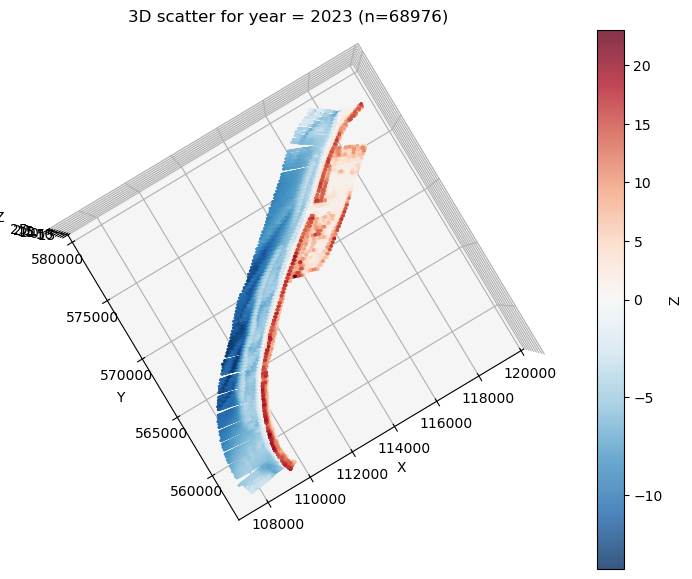

In [27]:
from matplotlib.colors import TwoSlopeNorm

# visualize data for year = xxxx

selected_year = 2023
sel_year = df_xyz[df_xyz['year'] == selected_year].copy()

max_points = 100000  # max points to plot

if sel_year.empty:
    print(f"No rows for year = {selected_year}")
else:
    # ensure numeric and drop bad rows
    sel_year[['X', 'Y', 'Z']] = sel_year[['X', 'Y', 'Z']].apply(pd.to_numeric, errors='coerce')
    sel_year = sel_year.dropna(subset=['X', 'Y', 'Z'])

    # downsample if too large
    if len(sel_year) > max_points:
        sel_year = sel_year.sample(max_points, random_state=1)

    # normalize with center at 0 so negatives map to red (left of center) and positives to blue
    z_vals = pd.to_numeric(sel_year['Z'], errors='coerce')
    norm = TwoSlopeNorm(vmin=z_vals.min(), vcenter=0, vmax=z_vals.max())
    cmap = plt.get_cmap('RdBu_r')  # reversed RdBu -> red for negative, blue for positive

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(sel_year['X'], sel_year['Y'], sel_year['Z'],
                    c=sel_year['Z'], cmap=cmap, norm=norm, s=1, alpha=0.8)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'3D scatter for year = {selected_year} (n={len(sel_year)})')
    fig.colorbar(sc, ax=ax, label='Z')

    # Rotate the view: elev=30, azim=90 rotates the plane by 90 degrees
    ax.view_init(elev=90, azim=-120)

    plt.show()


In [30]:
# Interactive 3D plot using Plotly
import plotly.express as px

selected_year = 2023
sel_year = df_xyz[df_xyz['year'] == selected_year].copy()

# use existing sel_year and max_points
if sel_year.empty:
    print(f"No rows for year = {selected_year}")
else:
    df_plot = sel_year.copy()
    # ensure numeric and drop bad rows
    df_plot[['X', 'Y', 'Z']] = df_plot[['X', 'Y', 'Z']].apply(pd.to_numeric, errors='coerce')
    df_plot = df_plot.dropna(subset=['X', 'Y', 'Z'])

    max_points = 30000  # limit for interactive plot

    # downsample if too large
    if len(df_plot) > max_points:
        df_plot = df_plot.sample(max_points, random_state=1)

    fig = px.scatter_3d(
        df_plot,
        x='X', y='Y', z='Z',
        color='Z',
        color_continuous_scale=[(0, 'red'), (0.5, 'white'), (1, 'blue')],
        color_continuous_midpoint=0,
        hover_data=['T', 'loc'],
        title=f'Interactive 3D scatter for year = {selected_year} (n={len(df_plot)})'
    )

    # ensure colorbar uses the data range (keeps midpoint at 0)
    fig.update_coloraxes(cmin=df_plot['Z'].min(), cmax=df_plot['Z'].max())
    fig.update_traces(marker=dict(size=2, opacity=0.8))
    fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
                      width=900, height=700)
    fig.show()


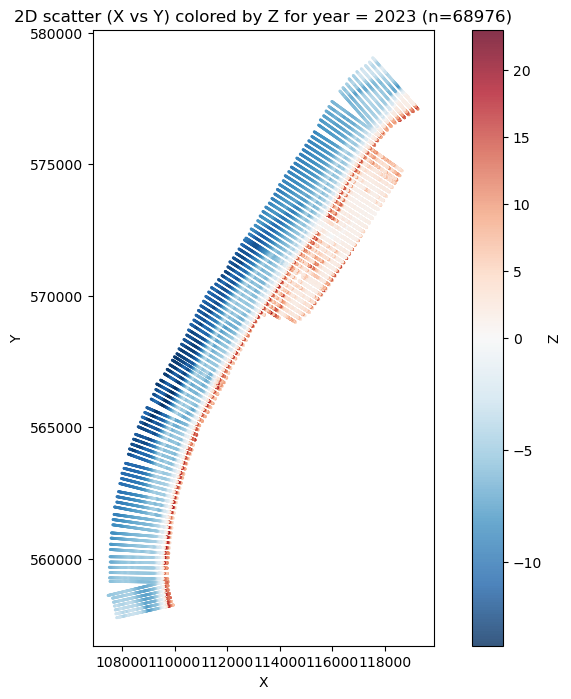

In [33]:
# 2D scatter of X vs Y colored by Z

selected_year = 2023
sel_year = df_xyz[df_xyz['year'] == selected_year].copy()

max_points = 100000  # max points to plot

if sel_year.empty:
    print(f"No rows for year = {selected_year}")
else:
    df2 = sel_year.copy()
    # ensure numeric and drop bad rows
    df2[['X', 'Y', 'Z']] = df2[['X', 'Y', 'Z']].apply(pd.to_numeric, errors='coerce')
    df2 = df2.dropna(subset=['X', 'Y', 'Z'])

    # downsample if too large
    if len(df2) > max_points:
        df2 = df2.sample(max_points, random_state=1)

    z_vals = df2['Z']
    norm2d = TwoSlopeNorm(vmin=z_vals.min(), vcenter=0, vmax=z_vals.max())

    fig2, ax2 = plt.subplots(figsize=(10, 8))
    sc2 = ax2.scatter(df2['X'], df2['Y'], c=z_vals, cmap=cmap, norm=norm2d,
                      s=1, alpha=0.8)
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title(f'2D scatter (X vs Y) colored by Z for year = {selected_year} (n={len(df2)})')
    ax2.set_aspect('equal', 'box')
    fig2.colorbar(sc2, ax=ax2, label='Z')
    plt.show()
